In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report

In [2]:
data= pd.read_csv("/kaggle/input/iris/Iris.csv")

# *Quick peek on the data*

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.drop('Id',axis=1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.duplicated().any()

True

In [8]:
data.drop_duplicates(inplace=True)

# *Scattering lenght vs width for Sepal and Petal* 

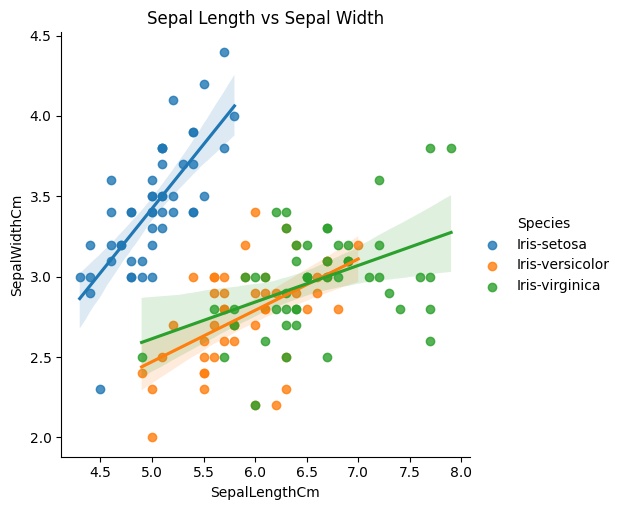

In [9]:
sns.lmplot(x="SepalLengthCm", y="SepalWidthCm", data=data, hue='Species', fit_reg=True)
plt.title("Sepal Length vs Sepal Width")
plt.show()


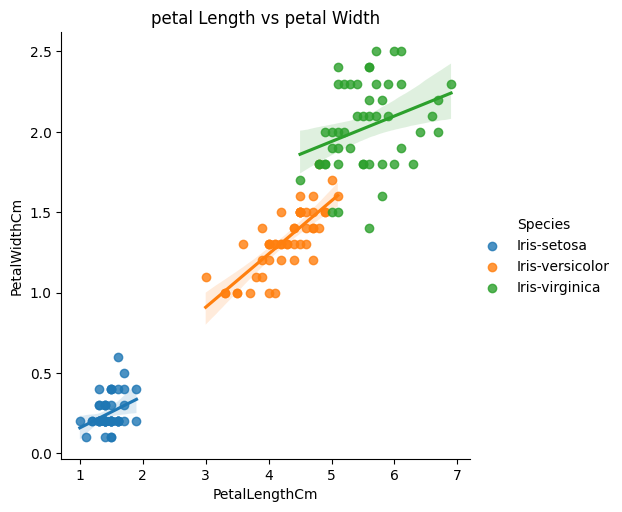

In [10]:
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", data=data, hue='Species', fit_reg=True)
plt.title("petal Length vs petal Width")
plt.show()

In [11]:
X = data.drop('Species',axis=1)
y = data['Species'] 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

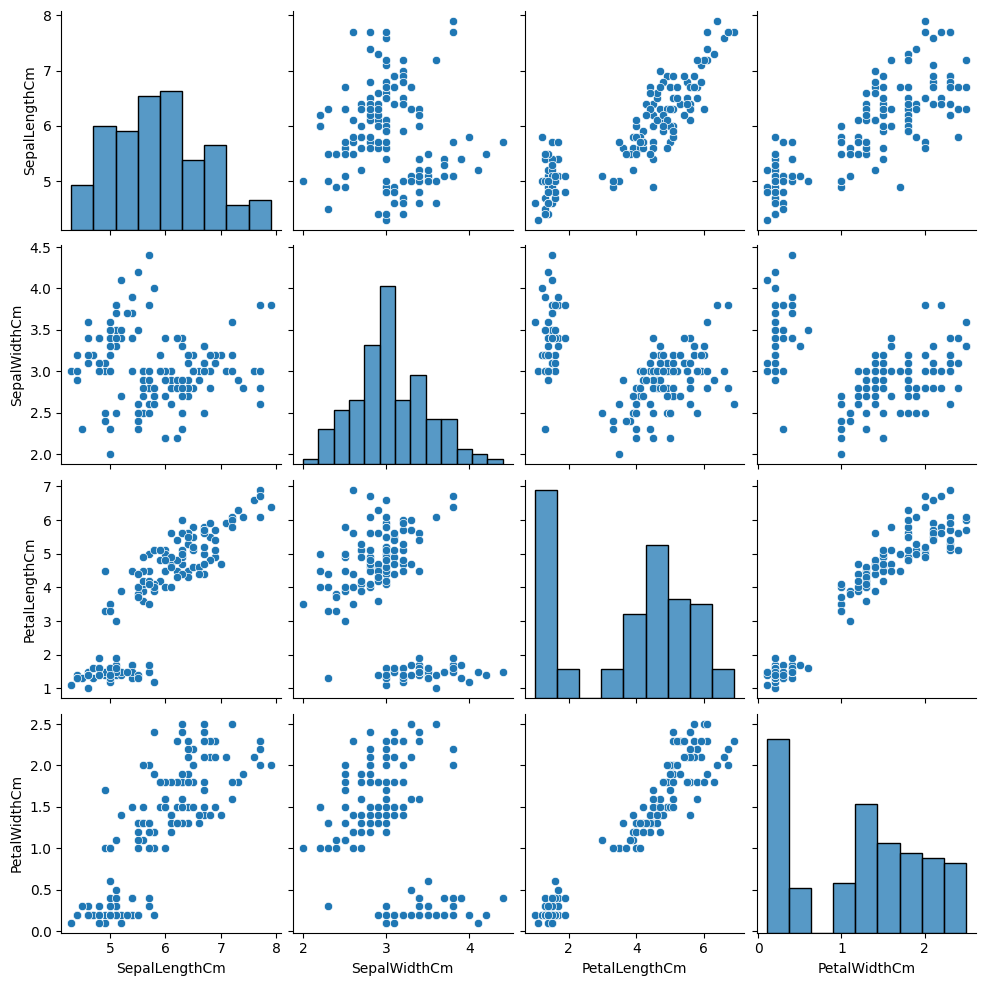

In [12]:
sns.pairplot(X)

In [13]:
y.value_counts()

Species
Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Species', ylabel='Count'>

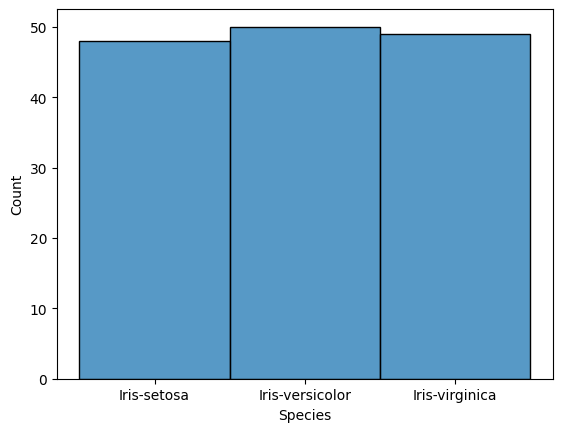

In [14]:
sns.histplot(y)

In [15]:
y = y.map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
x_train.shape,x_test.shape

((102, 4), (45, 4))

# *Using 3 different ways to calculate the metrics of KNN*

***Manhattan Distance***

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.86      1.00      0.92        12
           2       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



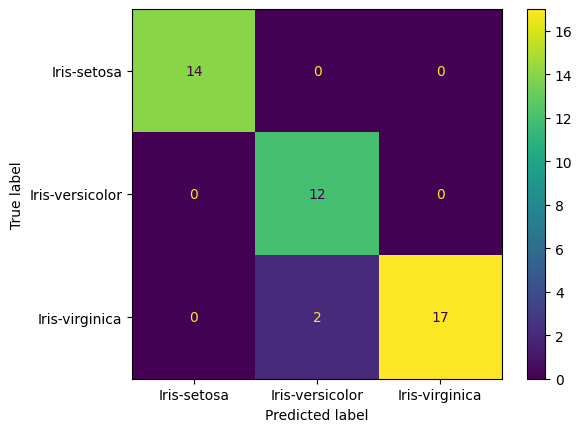

In [17]:
def manhattan_distance(x1, x2):
   return np.sum(np.abs(x1 - x2))

knn_m = KNeighborsClassifier(metric=manhattan_distance)
knn_m.fit(x_train, y_train)
y_pred = knn_m.predict(x_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['Iris-setosa','Iris-versicolor','Iris-virginica']).plot()

In [18]:
num_wrong_pred = (y_pred != y_test).sum()
num_right_pred = (y_pred == y_test).sum()
print(f'Number of wrong predictions: {num_wrong_pred}')
print(f'Number of right predictions: {num_right_pred}')

Number of wrong predictions: 2
Number of right predictions: 43


In [19]:
wrong_pred = np.where(y_pred != y_test)[0]
print(wrong_pred)
for index in wrong_pred:
    print(f'Wrong prediction: actual vs prediction =>  {y_test.iloc[index]} {y_pred[index]}')

[4 6]
Wrong prediction: actual vs prediction =>  2 1
Wrong prediction: actual vs prediction =>  2 1


***Euclidean Distance***

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      1.00      0.96        12
           2       1.00      0.95      0.97        19

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



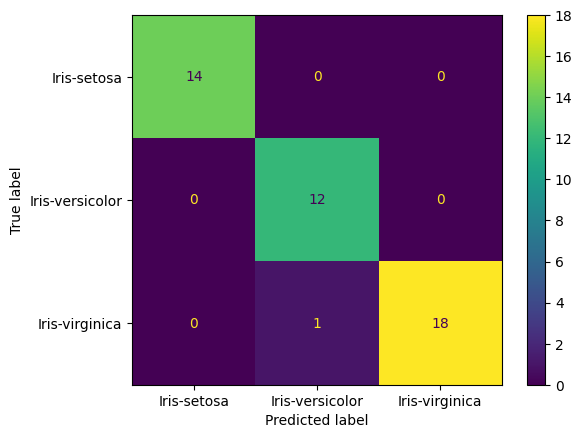

In [20]:
def euclidean_distance(x1, x2):
   return np.sqrt(np.sum((x1 - x2)**2))

knn_e= KNeighborsClassifier(metric=euclidean_distance)
knn_e.fit(x_train, y_train)
y_pred = knn_e.predict(x_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['Iris-setosa','Iris-versicolor','Iris-virginica']).plot()

In [21]:
num_wrong_pred = (y_pred != y_test).sum()
num_right_pred = (y_pred == y_test).sum()
print(f'Number of wrong predictions: {num_wrong_pred}')
print(f'Number of right predictions: {num_right_pred}')

Number of wrong predictions: 1
Number of right predictions: 44


In [22]:
wrong_pred = np.where(y_pred != y_test)[0]
print(wrong_pred)
for index in wrong_pred:
    print(f'Wrong prediction: actual vs prediction =>  {y_test.iloc[index]} {y_pred[index]}')

[4]
Wrong prediction: actual vs prediction =>  2 1


***Cosine similarity***

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.92      0.92      0.92        12
           2       0.95      0.95      0.95        19

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



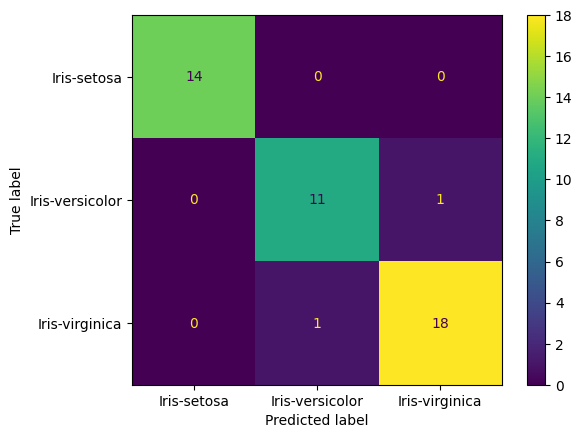

In [23]:
def cosine_similarity(x1, x2):
   return 1- (np.dot(x1, x2) / (np.sqrt(np.dot(x1, x1)) * np.sqrt(np.dot(x2, x2))))
   # return 1- (np.dot(x1, x2) / (np.sqrt(np.sum(x1**2)) * np.sqrt(np.sum(x2**2))))

knn_c= KNeighborsClassifier(metric=cosine_similarity)
knn_c.fit(x_train, y_train)
y_pred = knn_c.predict(x_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['Iris-setosa','Iris-versicolor','Iris-virginica']).plot()

In [24]:
num_wrong_pred = (y_pred != y_test).sum()
num_right_pred = (y_pred == y_test).sum()
print(f'Number of wrong predictions: {num_wrong_pred}')
print(f'Number of right predictions: {num_right_pred}')

Number of wrong predictions: 2
Number of right predictions: 43


In [25]:
wrong_pred = np.where(y_pred != y_test)[0]
print(wrong_pred)
for index in wrong_pred:
    print(f'Wrong prediction: actual vs prediction =>  {y_test.iloc[index]} {y_pred[index]}')

[ 4 37]
Wrong prediction: actual vs prediction =>  2 1
Wrong prediction: actual vs prediction =>  1 2


***As you can see each way has it's own prediction even if they have the same accuracy***